In [1]:
import pandas as pd
from random import choice
import datetime
import matplotlib.pyplot as plt
from matplotlib.colors import get_named_colors_mapping
import matplotlib.animation as animation
from IPython.display import HTML
import bar_chart_race as bcr
import warnings
warnings.filterwarnings('ignore')

In [2]:
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"

In [3]:
data=pd.read_csv(url)

In [4]:
#data = pd.read_csv("./inputs/owid-covid-data.csv")

In [5]:
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75807 entries, 0 to 75806
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               75807 non-null  object 
 1   continent                              72083 non-null  object 
 2   location                               75807 non-null  object 
 3   date                                   75807 non-null  object 
 4   total_cases                            74515 non-null  float64
 5   new_cases                              74513 non-null  float64
 6   new_cases_smoothed                     73512 non-null  float64
 7   total_deaths                           65246 non-null  float64
 8   new_deaths                             65404 non-null  float64
 9   new_deaths_smoothed                    73512 non-null  float64
 10  total_cases_per_million                74109 non-null  float64
 11  ne

In [7]:
data2 = data[["location","date","total_cases"]]

In [8]:
data2[["date"]]= data2[["date"]].apply(pd.to_datetime)

In [9]:
data2.info(),data2.date.min()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75807 entries, 0 to 75806
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   location     75807 non-null  object        
 1   date         75807 non-null  datetime64[ns]
 2   total_cases  74515 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.7+ MB


(None, Timestamp('2020-01-01 00:00:00'))

In [10]:
data2["days"] = ((data2["date"]-data2.date.min()).astype(int)/10e8)/86400

In [11]:
data2.head()

,location,date,total_cases,days
0,Afghanistan,2020-02-24,1.0,54.0
1,Afghanistan,2020-02-25,1.0,55.0
2,Afghanistan,2020-02-26,1.0,56.0
3,Afghanistan,2020-02-27,1.0,57.0
4,Afghanistan,2020-02-28,1.0,58.0


In [12]:
data2.days.max()

443.0

In [13]:
data2.dtypes

location               object
date           datetime64[ns]
total_cases           float64
days                  float64
dtype: object

In [14]:
data2["day"] = data2['date'].map(lambda x: x.day)
data2["month"] = data2['date'].map(lambda x: x.month)
data2["year"] = data2['date'].map(lambda x: x.year)
data2.head()

,location,date,total_cases,days,day,month,year
0,Afghanistan,2020-02-24,1.0,54.0,24,2,2020
1,Afghanistan,2020-02-25,1.0,55.0,25,2,2020
2,Afghanistan,2020-02-26,1.0,56.0,26,2,2020
3,Afghanistan,2020-02-27,1.0,57.0,27,2,2020
4,Afghanistan,2020-02-28,1.0,58.0,28,2,2020


In [15]:
data2= data2.drop(columns=["date","year"], index=1)

In [16]:
data2.head()

,location,total_cases,days,day,month
0,Afghanistan,1.0,54.0,24,2
2,Afghanistan,1.0,56.0,26,2
3,Afghanistan,1.0,57.0,27,2
4,Afghanistan,1.0,58.0,28,2
5,Afghanistan,1.0,59.0,29,2


In [17]:
#data2.set_index("location")
#data2.head()
data2 = data2.groupby(["location", "days"], as_index= False).sum()

In [18]:
data2

,location,days,total_cases,day,month
0,Afghanistan,54.0,1.0,24,2
1,Afghanistan,56.0,1.0,26,2
2,Afghanistan,57.0,1.0,27,2
3,Afghanistan,58.0,1.0,28,2
4,Afghanistan,59.0,1.0,29,2
...,...,...,...,...,...
75801,Zimbabwe,438.0,36484.0,14,3
75802,Zimbabwe,439.0,36504.0,15,3
75803,Zimbabwe,440.0,36535.0,16,3
75804,Zimbabwe,441.0,36552.0,17,3


In [19]:
data2.columns

Index(['location', 'days', 'total_cases', 'day', 'month'], dtype='object')

In [20]:
data2.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            75796, 75797, 75798, 75799, 75800, 75801, 75802, 75803, 75804,
            75805],
           dtype='int64', length=75806)

In [21]:
data2

,location,days,total_cases,day,month
0,Afghanistan,54.0,1.0,24,2
1,Afghanistan,56.0,1.0,26,2
2,Afghanistan,57.0,1.0,27,2
3,Afghanistan,58.0,1.0,28,2
4,Afghanistan,59.0,1.0,29,2
...,...,...,...,...,...
75801,Zimbabwe,438.0,36484.0,14,3
75802,Zimbabwe,439.0,36504.0,15,3
75803,Zimbabwe,440.0,36535.0,16,3
75804,Zimbabwe,441.0,36552.0,17,3


In [22]:
data2 = data2[~data2["location"].str.contains("World")]
data2

,location,days,total_cases,day,month
0,Afghanistan,54.0,1.0,24,2
1,Afghanistan,56.0,1.0,26,2
2,Afghanistan,57.0,1.0,27,2
3,Afghanistan,58.0,1.0,28,2
4,Afghanistan,59.0,1.0,29,2
...,...,...,...,...,...
75801,Zimbabwe,438.0,36484.0,14,3
75802,Zimbabwe,439.0,36504.0,15,3
75803,Zimbabwe,440.0,36535.0,16,3
75804,Zimbabwe,441.0,36552.0,17,3


In [23]:
data2.days.max()

443.0

,location,days,total_cases,day,month
69956,Turkey,150.0,163103.0,30,5
31230,India,150.0,181827.0,30,5
26443,Germany,150.0,183189.0,30,5
24902,France,150.0,190744.0,30,5
34053,Italy,150.0,232664.0,30,5
64179,Spain,150.0,239228.0,30,5
71558,United Kingdom,150.0,256469.0,30,5
56222,Russia,150.0,396575.0,30,5
9827,Brazil,150.0,498440.0,30,5
62996,South America,150.0,868854.0,30,5


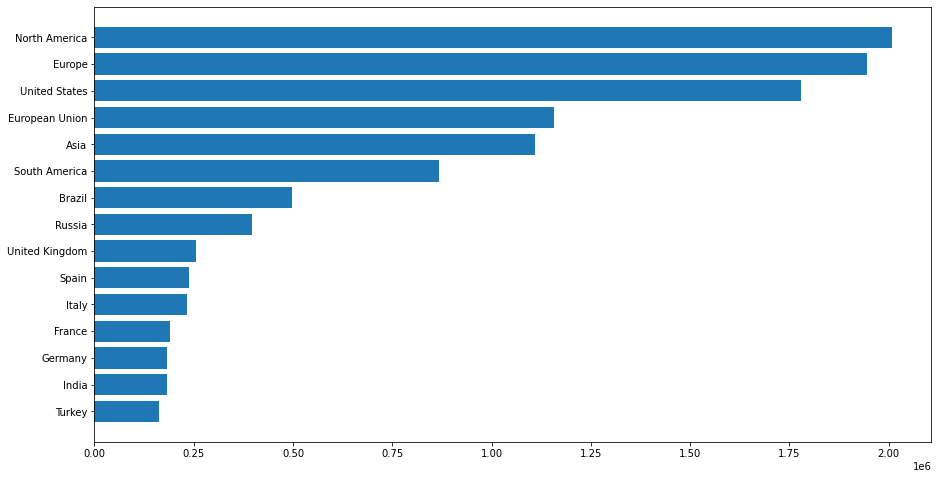

In [24]:
current_days=150
dff=(data2[data2.days.eq(current_days)].sort_values(by='total_cases', ascending=True).tail(15))
#dff[dff.location=="World"]


display(dff)

fig, ax=plt.subplots(figsize=(15,8))
ax.barh(dff.location, dff.total_cases);

In [25]:
countries = list(set(data2.location.tolist()))
values = get_named_colors_mapping().values()

values_list = list(values)

Text(1, 0.4, 'May')

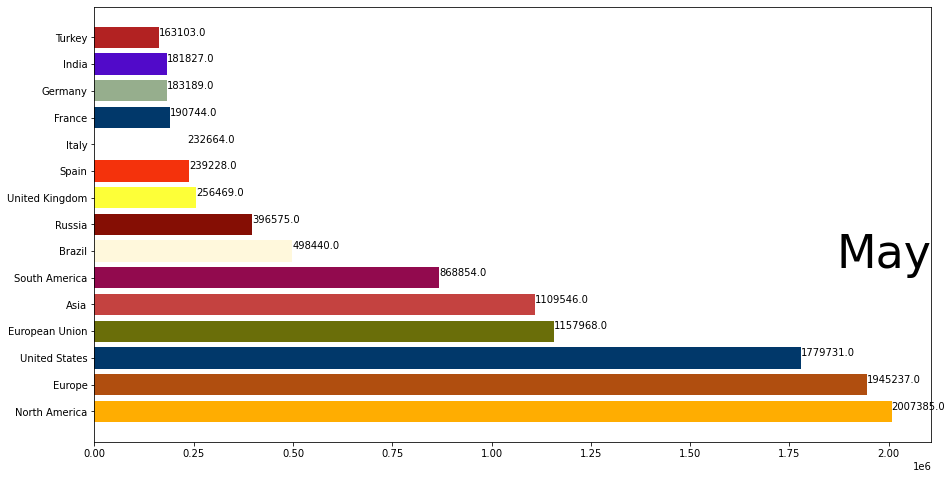

In [26]:
colors=dict(zip(countries,
                [choice(values_list)for x in countries]))

fig, ax = plt.subplots(figsize=(15, 8))
dff = dff[::-1]   

ax.barh(dff['location'], dff['total_cases'], color=[colors[x] for x in dff['location']])

for i, (name, value) in enumerate(zip(dff['location'], dff['total_cases'])):
    #ax.text(value, i,     name,            ha='right')  
    ax.text(value, i,     value,           ha='left',va='bottom')   

ax.text(1, 0.4, datetime.date(1900, dff['month'].mean().astype(int), 1).strftime('%B'), transform=ax.transAxes, size=46, ha='right')

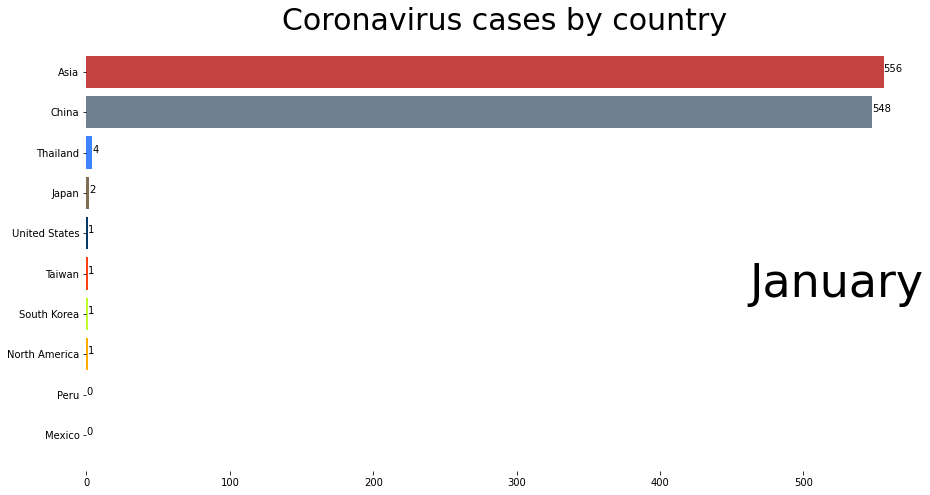

In [27]:
fig, ax = plt.subplots(figsize=(15, 8))
def draw_barchar(day):
    dff=(data2[data2.days.eq(day)].sort_values(by='total_cases', ascending=True).tail(10))
    ax.clear()
    ax.barh(dff['location'], dff['total_cases'], color=[colors[x] for x in dff['location']])
    
    for i, (name, value) in enumerate(zip(dff['location'], dff['total_cases'].astype(int))):
        #ax.text(value, i,     name,            ha='right')  
        ax.text(value, i,     value,           ha='left')   

    
    ax.text(1, 0.4, datetime.date(1900, dff['month'].mean().astype(int), 1).strftime('%B'), transform=ax.transAxes, size=46, ha='right')
    #ax.text(1, 0.4, month, transform=ax.transAxes, size=46, ha='right')
    ax.set_title('Coronavirus cases by country', fontdict={'fontsize': 30})
    plt.box(False)
    
draw_barchar(21)

In [28]:
'''
fig, ax = plt.subplots(figsize=(15, 8))

animator = animation.FuncAnimation(fig, draw_barchar, frames=range(20, data2.days.max().astype(int)))

HTML(animator.to_jshtml()) 
animator.save("outputs/Racing Bar Chart.mp4", fps = 10, bitrate = 10000)
animator.save('outputs/race.gif', writer='imagemagick')
'''

'\nfig, ax = plt.subplots(figsize=(15, 8))\n\nanimator = animation.FuncAnimation(fig, draw_barchar, frames=range(20, data2.days.max().astype(int)))\n\nHTML(animator.to_jshtml()) \nanimator.save("outputs/Racing Bar Chart.mp4", fps = 10, bitrate = 10000)\nanimator.save(\'outputs/race.gif\', writer=\'imagemagick\')\n'

In [29]:
data = data[~data["location"].str.contains("World")]
data = data[~data["location"].str.contains("International")]
data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75802,ZWE,Africa,Zimbabwe,2021-03-14,36484.0,13.0,30.429,1503.0,2.0,2.571,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
75803,ZWE,Africa,Zimbabwe,2021-03-15,36504.0,20.0,30.714,1504.0,1.0,2.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
75804,ZWE,Africa,Zimbabwe,2021-03-16,36535.0,31.0,30.571,1507.0,3.0,2.571,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
75805,ZWE,Africa,Zimbabwe,2021-03-17,36552.0,17.0,30.143,1508.0,1.0,2.714,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


In [30]:
df_values, df_ranks = bcr.prepare_long_data(data, index='date', columns=['location'],
                                            values='total_cases', steps_per_period=1)

df_values

location,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,United States,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-15,55985.0,4044120.0,118017.0,115410.0,11289.0,21407.0,0.0,963.0,2201886.0,178702.0,...,29495424.0,72862.0,80678.0,3.0,27.0,146488.0,2557.0,2908.0,84950.0,36504.0
2021-03-16,55995.0,4053103.0,118492.0,115540.0,11319.0,21446.0,0.0,992.0,2210121.0,179287.0,...,29549003.0,73770.0,80743.0,3.0,27.0,147028.0,2560.0,2969.0,85240.0,36535.0
2021-03-17,56016.0,4064224.0,118938.0,115688.0,11360.0,21489.0,0.0,992.0,2218425.0,180141.0,...,29607483.0,75138.0,80858.0,3.0,27.0,147577.0,2567.0,3037.0,85502.0,36552.0


In [31]:
df_ranks

location,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,United States,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,213.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,213.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,213.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,213.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,213.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-15,105.0,202.0,128.0,127.0,74.0,86.0,16.0,33.0,196.0,138.0,...,211.0,112.0,114.0,18.0,22.0,133.0,43.0,45.0,117.0,98.0
2021-03-16,105.0,202.0,128.0,127.0,74.0,86.0,16.0,34.0,196.0,138.0,...,211.0,112.0,114.0,18.0,22.0,132.0,43.0,45.0,117.0,98.0
2021-03-17,105.0,202.0,128.0,126.0,74.0,86.0,16.0,34.0,196.0,138.0,...,211.0,112.0,114.0,18.0,22.0,131.0,43.0,45.0,117.0,98.0


In [32]:
'''
df_values = df_values.fillna(0)
df_values["Europe"]
df = df_values["Europe"]
df.columns
'''

'\ndf_values = df_values.fillna(0)\ndf_values["Europe"]\ndf = df_values["Europe"]\ndf.columns\n'

In [33]:
%%time
bcr.bar_chart_race(df=df_values, n_bars=10,fixed_max=False,figsize=(5, 3),title='COVID-19 cases by Country',
                   filter_column_colors=True,orientation='h',steps_per_period=10,
                   filename='outputs/covid19_vert2.mp4')

CPU times: user 9min 6s, sys: 3min 55s, total: 13min 2s
Wall time: 4min 23s


In [34]:
%%time
bcr.bar_chart_race(df=df_values, n_bars=15,fixed_max=False,figsize=(5, 3),title='COVID-19 cases by Country',
                   filter_column_colors=True,orientation='h',steps_per_period=5,
                   filename='outputs/race.gif')

CPU times: user 5min 56s, sys: 2min 37s, total: 8min 34s
Wall time: 7min 39s


In [35]:
'''
import plotly.express as px

data = data.fillna(0)
fig = px.line(data, x="date", y="location", color='new_cases')
fig.show()
'''

'\nimport plotly.express as px\n\ndata = data.fillna(0)\nfig = px.line(data, x="date", y="location", color=\'new_cases\')\nfig.show()\n'

In [36]:
import ipywidgets as widgets



In [37]:
list(set(data.continent.values))

[nan, 'South America', 'Oceania', 'Africa', 'Asia', 'Europe', 'North America']

In [38]:
continent = widgets.Select(
    options=list(set(data.continent.values)),
    value='Europe',
    # rows=10,
    description='continent:',
    disabled=False
)

display(continent)

Select(description='continent:', index=5, options=(nan, 'South America', 'Oceania', 'Africa', 'Asia', 'Europe'…

In [39]:
continent.value

'Europe'

In [40]:
data[data.continent==continent.value]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
789,ALB,Europe,Albania,2020-02-25,NaN,NaN,NaN,NaN,NaN,NaN,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795
790,ALB,Europe,Albania,2020-02-26,NaN,NaN,NaN,NaN,NaN,NaN,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795
791,ALB,Europe,Albania,2020-02-27,NaN,NaN,NaN,NaN,NaN,NaN,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795
792,ALB,Europe,Albania,2020-02-28,NaN,NaN,NaN,NaN,NaN,NaN,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795
793,ALB,Europe,Albania,2020-02-29,NaN,NaN,NaN,NaN,NaN,NaN,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73516,VAT,Europe,Vatican,2021-03-14,27.0,0.0,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.12,NaN
73517,VAT,Europe,Vatican,2021-03-15,27.0,0.0,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.12,NaN
73518,VAT,Europe,Vatican,2021-03-16,27.0,0.0,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.12,NaN
73519,VAT,Europe,Vatican,2021-03-17,27.0,0.0,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.12,NaN


In [41]:
df_values2, df_ranks2 = bcr.prepare_long_data(data[data.continent==continent.value], index='date', columns=['location'],
                                            values='total_cases', steps_per_period=1)

df_values2 = df_values2.fillna(0)
df_values2

location,Albania,Andorra,Austria,Belarus,Belgium,Bosnia and Herzegovina,Bulgaria,Croatia,Cyprus,Czechia,...,San Marino,Serbia,Slovakia,Slovenia,Spain,Sweden,Switzerland,Ukraine,United Kingdom,Vatican
date,,,,,,,,,,,,,,,,,,,,,
2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-14,117474.0,11266.0,493568.0,302323.0,808283.0,142160.0,278557.0,251045.0,39651.0,1399078.0,...,4126.0,516277.0,337503.0,200374.0,3183704.0,712527.0,570645.0,1509983.0,4271710.0,27.0
2021-03-15,118017.0,11289.0,495464.0,303270.0,809861.0,144831.0,283194.0,251174.0,39869.0,1402420.0,...,4151.0,520911.0,337960.0,200579.0,3195062.0,712527.0,573815.0,1516865.0,4276840.0,27.0
2021-03-16,118492.0,11319.0,497889.0,304146.0,813026.0,146437.0,287568.0,251865.0,40344.0,1412962.0,...,4204.0,526112.0,339538.0,201497.0,3200024.0,725289.0,575253.0,1526595.0,4282203.0,27.0


In [42]:
%%time
bcr.bar_chart_race(df=df_values2, n_bars=15,fixed_max=False,figsize=(5, 3),title=f'COVID-19 cases by Country in {continent.value}',
                   filter_column_colors=True,orientation='h',steps_per_period=10,
                   filename='outputs/racecountry.gif')

CPU times: user 11min 18s, sys: 5min 1s, total: 16min 19s
Wall time: 19min 16s
